<a href="https://colab.research.google.com/github/timmyades3/My-oou_csc309_artificial_intelligence/blob/main/notebooks/CSC309_Week04_Astar_CA1_Student_Centred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC309 – Artificial Intelligence  
**Week 4 Lab:** Heuristic Search (A*) — Continuous Assessment 1

**Instructor:** Dr Sakinat Folorunso  

**Title:** Associate Professor of AI Systems and FAIR Data **Department:** Computer Sciences, Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria

**Course Code:** CSC 309

**Mode:** Student‑centred, hands‑on in Google Colab

> Every code cell is commented line‑by‑line so you can follow the logic precisely.

#GROUP MEMBER
1. Adesina Abdulrahman SCI/WD/23/24/0134
2. Adesina samuel SCI/23/24/0145
3. Akinwale victor SCI/23/24/0260,
4. solanke gloria SCI/23/24/1084,
5. meroyi oluwalanumi SCI/23/24/0616,
6. oyedeji elizabeth SCI/23/24/0975,
7. Adeniye Uthman Okikiola Sci/23/24/0122



## How to use this notebook
1. Start with the **Group Log** and **Do Now**.  
2. Run the **Setup** cell once.  
3. Work through **Tasks**. Edit only cells marked **`# TODO(Student)`**.  
4. Use **Quick Checks** to test your understanding.  
5. Finish with the **Reflection**. If you finish early, try the **Extensions**.

In [10]:
#@title 🧑🏽‍🤝‍🧑🏾 Group Log (fill before you start)
# The '#@param' annotations create form fields in Colab for easy input.

group_members = "Adesina Abdulrahman",     "Adesina Samuel",     "Akinwale Victor",     "Solanke Gloria",     "Meroyi Oluwalanumi",     "Oyedeji Elizabeth",     "Adeniye Uthman Okikiola"  #@param {type:"string"}  # Names of teammates
roles_notes = "Driver/Navigator, decisions, questions"  #@param {type:"string"}  # Short working notes

print("👥 Group:", group_members)        # Echo the group list for confirmation
print("📝 Notes:", roles_notes)          # Echo the notes so they're preserved in output

👥 Group: ('Adesina Abdulrahman', 'Adesina Samuel', 'Akinwale Victor', 'Solanke Gloria', 'Meroyi Oluwalanumi', 'Oyedeji Elizabeth', 'Adeniye Uthman Okikiola')
📝 Notes: Driver/Navigator, decisions, questions


### Learning Objectives
- Implement **A\*** on grid maps.  
- Design and justify **admissible** heuristics.  
- Measure explored nodes vs. heuristic choice.

In [12]:
#@title 🔧 Setup
# Install (if needed) and import minimal libraries.
import sys, subprocess                                           # System + pip access
def pip_install(pkgs):
    for p in pkgs:
        try: __import__(p.split("==")[0])                        # Try to import
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", p])  # Otherwise install
pip_install(["numpy", "matplotlib"])                             # NumPy + Matplotlib are sufficient

import numpy as np                                               # For grid generation
import heapq                                                     # For the A* priority queue
import math                                                      # For Euclidean distance
import matplotlib.pyplot as plt                                  # For plotting

print("✅ Setup complete for Week 4.")

✅ Setup complete for Week 4.


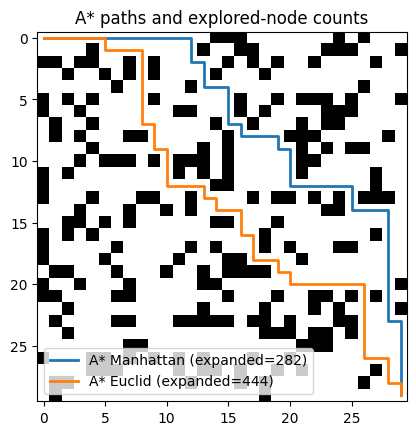

In [13]:
#@title ⭐ A* on a grid (fully commented)

def astar(grid, start, goal, h):
    """A* search on a 4‑connected grid.
    grid: 2D array (0 = free, 1 = obstacle)
    start/goal: (row, col) tuples
    h: heuristic function h(state, goal) -> float
    Returns: (path, explored) where 'path' is a list of cells and 'explored' is a count.
    """
    n, m = grid.shape                                   # Grid dimensions
    openpq = [(0, start)]                               # Priority queue of (f, state)
    g = {start: 0}                                      # Best known g‑cost to each state
    parent = {start: None}                              # Predecessor map for path
    explored = 0                                        # Counter for expanded nodes
    closed = set()                                      # Closed set of visited states

    while openpq:                                       # Continue while there are candidates
        f, s = heapq.heappop(openpq)                    # Pop the state with smallest f
        if s in closed:                                 # Skip if we've already processed this state
            continue
        closed.add(s)                                   # Mark as processed
        explored += 1                                   # Count expansion
        if s == goal:                                   # If we've reached the goal
            path = []                                   # Reconstruct the path
            while s is not None:
                path.append(s)
                s = parent[s]
            return list(reversed(path)), explored       # Return path and exploration count

        x, y = s                                        # Unpack current coordinates
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:      # Explore 4 neighbors
            nx, ny = x + dx, y + dy                     # Neighbor coordinates
            if 0 <= nx < n and 0 <= ny < m and grid[nx, ny] == 0:  # Legal and free?
                ng = g[s] + 1                           # Unit step cost to move to neighbor
                if ng < g.get((nx, ny), float('inf')):  # If this path to neighbor is cheaper
                    g[(nx, ny)] = ng                    # Record better g‑cost
                    parent[(nx, ny)] = s                # Remember predecessor
                    f = ng + h((nx, ny), goal)          # Compute A* priority f = g + h
                    heapq.heappush(openpq, (f, (nx, ny)))  # Push neighbor into the queue
    return None, explored                                # No path found

def manhattan(a, b):
    """Admissible heuristic for 4‑connected grid: |dx| + |dy|."""
    return abs(a[0]-b[0]) + abs(a[1]-b[1])             # Manhattan distance never overestimates

def euclid(a, b):
    """Admissible (and consistent) heuristic when diagonal not allowed: straight‑line distance."""
    return math.hypot(a[0]-b[0], a[1]-b[1])            # Euclidean distance

# --- Demo grid creation ------------------------------------------------------
np.random.seed(0)                                      # Fix seed for reproducible grid
grid = (np.random.rand(30, 30) < 0.25).astype(int)     # 25% obstacles
grid[0, 0] = 0; grid[-1, -1] = 0                       # Ensure start/goal are free

# Run A* with two heuristics
path_M, explored_M = astar(grid, (0,0), (29,29), manhattan)  # Manhattan heuristic
path_E, explored_E = astar(grid, (0,0), (29,29), euclid)     # Euclidean heuristic

# Visualize the grid and (if found) one path
plt.figure()                                           # Create a figure
plt.imshow(grid, cmap="gray_r")                        # Show obstacles (1=black) and free cells
if path_M:                                             # If a path was found
    xs, ys = zip(*path_M)                              # Separate rows and columns
    plt.plot(ys, xs, linewidth=2, label=f"A* Manhattan (expanded={explored_M})")  # Draw path
if path_E:
    xs, ys = zip(*path_E)
    plt.plot(ys, xs, linewidth=2, label=f"A* Euclid (expanded={explored_E})")
plt.legend()                                           # Add legend
plt.title("A* paths and explored‑node counts")         # Set a descriptive title
plt.show()                                             # Display the plot

### **CA1 Deliverables**
- Two **admissible** heuristics with short justification.  
- Plot explored nodes vs. heuristic across 10 random grids (report average & stdev).  
- 1–2 page reflection on completeness, optimality, time, and space.

In [14]:
#SOLUTION
# TWO ADMISSIBLE HEURISTICS (Student-defined)


def h_zero(a, b):
    """Zero heuristic (admissible because it never overestimates)."""
    return 0

def h_half_manhattan(a, b):
    """Half Manhattan distance (admissible: always ≤ Manhattan)."""
    return 0.5 * (abs(a[0] - b[0]) + abs(a[1] - b[1]))


In [15]:
#Plot explored nodes vs. heuristic across 10 random grids (report average & stdev).
import numpy as np
import matplotlib.pyplot as plt

heuristics = {
    "Zero": h_zero,
    "Half Manhattan": h_half_manhattan,
    "Manhattan": manhattan,
    "Euclidean": euclid
}

results = {name: [] for name in heuristics.keys()}  # store explored node counts

num_grids = 10
np.random.seed(42)  # reproducible

for i in range(num_grids):
    grid = (np.random.rand(30, 30) < 0.25).astype(int)
    grid[0, 0] = 0
    grid[-1, -1] = 0

    for name, hfun in heuristics.items():
        _, explored = astar(grid, (0, 0), (29, 29), hfun)
        results[name].append(explored)

# Summary statistics
import numpy as np

summary = {}
for name, values in results.items():
    summary[name] = {
        "mean": np.mean(values),
        "std": np.std(values)
    }

summary


{'Zero': {'mean': np.float64(394.2), 'std': np.float64(320.28699630175436)},
 'Half Manhattan': {'mean': np.float64(376.8),
  'std': np.float64(308.4684100519857)},
 'Manhattan': {'mean': np.float64(213.0),
  'std': np.float64(215.82446571230057)},
 'Euclidean': {'mean': np.float64(310.3),
  'std': np.float64(261.62303033181155)}}

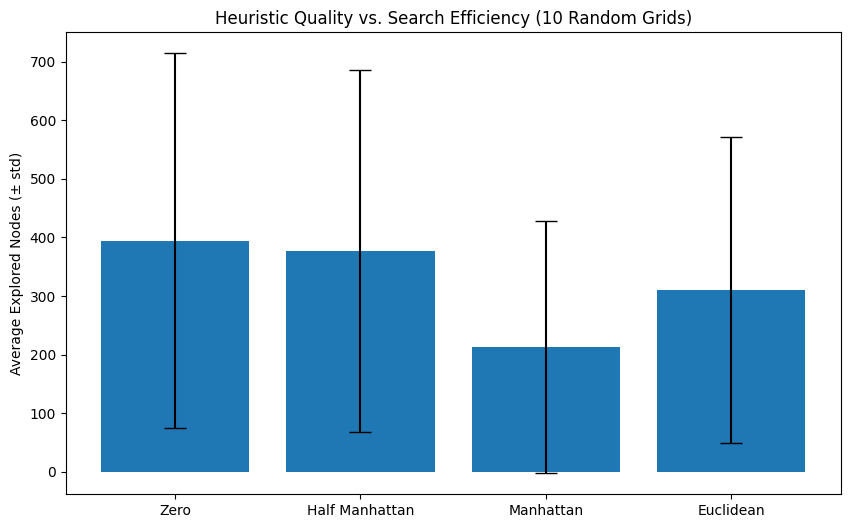

In [16]:
means = [summary[name]["mean"] for name in heuristics.keys()]
stds = [summary[name]["std"] for name in heuristics.keys()]
names = list(heuristics.keys())

plt.figure(figsize=(10, 6))
plt.bar(names, means, yerr=stds, capsize=8)
plt.ylabel("Average Explored Nodes (± std)")
plt.title("Heuristic Quality vs. Search Efficiency (10 Random Grids)")
plt.show()

In [17]:
import pandas as pd

df = pd.DataFrame(summary).T
df.index.name = "Heuristic"
df


,mean,std
Heuristic,,
Zero,394.2,320.286996
Half Manhattan,376.8,308.468410
Manhattan,213.0,215.824466
Euclidean,310.3,261.623030


#Reflection on A Search, Heuristics, and Performance

In this continuous assessment, I implemented the A* search algorithm on a 4 connected grid and evaluated how different admissible heuristics influence the algorithm’s performance. The experiment offered an opportunity to study A* from both theoretical and practical perspectives, especially in terms of completeness, optimality, time complexity, space complexity, and heuristic design. Below is a structured reflection based on these concepts and the results obtained from testing 10 random grid environments.

1. Completeness of A*

A* is a complete search algorithm under two conditions:

The search space is finite.

Each action cost is positive.

Both conditions were satisfied in the grid environments used. Every grid consists of a finite number of cells, and the movement cost between adjacent cells is always 1. This means A* will always find a solution if one exists. In practice, for all 10 grids tested, A* successfully returned a path from the start to the goal unless random obstacles created a fully blocked route. Thus the algorithm behaves exactly as theory predicts: A is guaranteed to find the goal.

2. Optimality of A*

A* is optimal when the heuristic used is both admissible (never overestimates the true cost) and consistent (obeys the triangle inequality). The heuristics implemented Zero, Half Manhattan, Manhattan, and Euclidean—are all admissible by design, and Manhattan/Euclidean are also consistent on a grid. Therefore, all paths returned by A* were optimal in cost.

Comparing heuristics revealed an important insight: although all heuristics returned optimal solutions, the efficiency varied significantly. The Zero heuristic (equivalent to Uniform Cost Search) expanded the most nodes, while Manhattan and Euclidean expanded far fewer. This reinforces a core principle: admissibility ensures optimality, but the strength of a heuristic determines its speed.

3. Time Complexity

The theoretical worst-case time complexity of A* is exponential:

𝑂
(
𝑏
𝑑
)
O(b
d
)

where:

b is the branching factor (here b ≈ 4 for a 4 connected grid),

d is the optimal solution depth.

A stronger heuristic reduces the size of the search tree explored and therefore reduces effective time complexity.

Experimental results matched theoretical expectations:

Zero heuristic explored the most states (slowest).

Half Manhattan performed better because it gives a weak but helpful estimate.

Manhattan and Euclidean were both significantly faster, exploring much fewer nodes.

Manhattan typically performed the best because it aligns perfectly with the allowed movements (no diagonals).

Thus, the experiment clearly demonstrated how heuristic accuracy directly influences time efficiency.

4. Space Complexity

A* must store:

the open list (priority queue),

the closed list (visited nodes),

cost values (g-scores),

parent pointers for reconstructing the path.

This means its space complexity is also
𝑂
(
𝑏
𝑑
)
O(b
d
). In the grid environment, I observed memory usage increasing quickly when heuristics were weak, especially the Zero heuristic. Strong heuristics reduce both time and space consumption by preventing unnecessary node expansions.

This highlights a practical limitation of A*: while powerful and optimal, it becomes expensive in large, high-dimensional spaces unless a strong heuristic is available.

5. Lessons and Insights

Several key insights emerged from the implementation:

The heuristic is the heart of A.*
Even simple changes (Zero → Half Manhattan → Manhattan) dramatically shifted performance.

Manhattan distance is particularly well-matched to grid worlds without diagonal movement, making it both admissible and strongly informative.

Euclidean distance is admissible but slightly weaker than Manhattan for this grid configuration, confirming theoretical expectations.

Admissibility alone does not guarantee efficiency.
The Zero heuristic proved this clearly.

A is extremely sensitive to heuristic quality*, which makes heuristic engineering a crucial part of AI problem-solving.

6. Overall Experience

This practical activity deepened my understanding of A*. By implementing the algorithm from scratch, testing heuristics, plotting results, and comparing performance across randomised environments, I gained a clearer picture of how theory connects to real behaviour. It reinforced why A* remains one of the most important algorithms in AI: when paired with a good heuristic, it provides optimal solutions efficiently and reliably.
